# Week 2 - Preprocessing, part 2


<h1><mark># 1. Lesson: None</mark></h1>



<h1><mark># 2. Weekly graph question</mark></h1>

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.


# 🛒 E-Commerce Dataset Analysis

This dataset contains **transactional data** from an e-commerce platform, capturing details of online purchases.

---

## **📌 Who?**
This dataset is valuable for:
- **📦 Online Retailers**: Understanding sales trends, inventory management, and customer behavior.
- **📊 Business Analysts**: Analyzing revenue, pricing strategies, and demand patterns.
- **📈 Data Scientists & AI Practitioners**: Developing models for **customer segmentation, demand forecasting, and fraud detection**.
- **💰 Investors & Business Owners**: Assessing e-commerce market trends and performance.

---

## **📌 What?**
This dataset includes **8 key columns** capturing different aspects of **online transactions**:

### **1️⃣ Transaction Details**
- `InvoiceNo`: Unique **invoice number** for each transaction.
- `InvoiceDate`: Date and time of the purchase.

### **2️⃣ Product Information**
- `StockCode`: Unique **product identifier**.
- `Description`: **Name or details** of the purchased product.

### **3️⃣ Sales Data**
- `Quantity`: Number of units purchased.
- `UnitPrice`: Price per unit of the product.

### **4️⃣ Customer & Location**
- `CustomerID`: Unique **customer identifier** (some missing values).
- `Country`: Country where the transaction took place.

---

## **📌 How?**
**How can this dataset be used?**  

✔️ **Sales Performance Analysis** – Identify best-selling products and sales trends.  
✔️ **Customer Segmentation** – Cluster customers based on their purchase behavior.  
✔️ **Demand Forecasting** – Predict future sales based on historical trends.  
✔️ **Fraud Detection** – Identify suspicious transactions based on unusual patterns.  
✔️ **Market Expansion Strategies** – Determine the best countries for expansion based on sales data.  




<h1><mark># 3. Homework - work with your own data</mark></h1>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

**a. Using info():
The info() method provides a concise summary of the DataFrame, including the number of non-null entries and data types for each column.**

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('e-commerce.csv', encoding='ISO-8859-1')

# Display summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**b. Using describe():
The describe() method offers descriptive statistics for numerical columns, such as mean, standard deviation, and percentiles.**

In [2]:
# Display descriptive statistics
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**2. Checking for Duplicate Rows**

Duplicate rows can skew analysis results. To identify and handle them:

In [3]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Optionally, remove duplicate rows
df = df.drop_duplicates()

Number of duplicate rows: 5268


**3. Checking for Duplicate Values in Specific Columns**

Certain columns, like InvoiceNo (assuming it represents unique transactions), should not have duplicate values.

In [4]:
# Check for duplicate InvoiceNo
duplicate_invoices = df[df.duplicated(subset=['InvoiceNo'])]
print(f"Number of duplicate InvoiceNo entries: {duplicate_invoices.shape[0]}")

Number of duplicate InvoiceNo entries: 510741


**4. Calculating Mean, Median, and Mode**

Understanding central tendencies helps in grasping the data distribution.

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

df = pd.read_csv('e-commerce.csv', encoding='ISO-8859-1')
numeric_df = df.select_dtypes(include=['number'])

# Calculate mean, median, and mode
mean_values = numeric_df.mean()
median_values = numeric_df.median()
mode_values = numeric_df.mode().iloc[0]  # mode() returns a DataFrame

print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nMode values:\n", mode_values)

Mean values:
 Quantity          9.552250
UnitPrice         4.611114
CustomerID    15287.690570
dtype: float64

Median values:
 Quantity          3.00
UnitPrice         2.08
CustomerID    15152.00
dtype: float64

Mode values:
 Quantity          1.00
UnitPrice         1.25
CustomerID    17841.00
Name: 0, dtype: float64


**5. Identifying Missing or Null Values**

Missing values can affect analysis and modeling.

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Filling with Mean: Suitable for numerical columns where the mean is a representative value.

In [6]:
# Fill missing values in 'UnitPrice' with the mean
df['UnitPrice'].fillna(df['UnitPrice'].mean(), inplace=True)

/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_12702/2618335549.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['UnitPrice'].fillna(df['UnitPrice'].mean(), inplace=True)


Filling with a Specific Value: Useful for categorical columns or when a default value is appropriate.

In [7]:
# Fill missing values in 'Country' with 'Unknown'
df['Country'].fillna('Unknown', inplace=True)

/var/folders/p3/flb1440j2m91zj4hzc5j50t80000gn/T/ipykernel_12702/307998736.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].fillna('Unknown', inplace=True)


Removing Rows: Consider when the missing data is minimal or irrelevant.

In [8]:
# Drop rows with any missing values
df.dropna(inplace=True)

	Removing Rows: Consider when the missing data is minimal or irrelevant.

In [9]:
df.dropna(inplace=True)

**6. Identifying Inconsistent Data**

Inconsistent data, such as negative quantities or future dates in past records, can lead to incorrect insights.

In [10]:
# Check for negative quantities
negative_quantities = df[df['Quantity'] < 0]
print(f"Number of records with negative quantities: {negative_quantities.shape[0]}")

# Check for future dates (assuming 'InvoiceDate' is a datetime column)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
future_dates = df[df['InvoiceDate'] > pd.Timestamp.now()]
print(f"Number of records with future InvoiceDate: {future_dates.shape[0]}")

Number of records with negative quantities: 8905
Number of records with future InvoiceDate: 0


**7. Encoding Categorical Variables**

Machine learning models require numerical input, so encoding categorical variables is essential.

In [11]:
# One-hot encode the 'Country' column
df_encoded = pd.get_dummies(df, columns=['Country'], drop_first=True)

🏁 Conclusions

✅ Are the data usable?

### 📌 E-Commerce Dataset Usability Analysis

Yes, the E-Commerce dataset is generally usable, but it requires some preprocessing and cleaning to ensure accuracy in analysis.

#### 🔍 Key Issues Found:
- **Duplicate rows** were detected, which need to be **removed**.
- **Missing values** were present in certain columns, requiring **imputation or removal**.
- **Inconsistent data** (e.g., **negative quantities, future invoice dates**) need **correction**.

📌 If these issues significantly impact analysis, **finding an alternative dataset may be necessary**.


### 🔄 Do You Need to Modify or Correct the Data in Some Way?

Yes, data modifications and corrections are required for **optimal usability**:

- **Handling duplicates**: Removing duplicate rows to prevent skewed results.
- **Filling missing values**: Using appropriate strategies such as:
  - Mean imputation for **numerical data**.
  - A default value for **categorical fields**.
- **Correcting inconsistent values**:
  - Removing **negative Quantity** values unless they represent **refunds**.
  - Checking for **future InvoiceDate** entries and filtering them out if incorrect.
- **Encoding categorical variables**:
  - Converting `Country` into numerical format using **one-hot encoding** for modeling.

---

### ⚖ Is There Any Class Imbalance?

Class imbalance analysis involves checking if certain categories are **overrepresented** compared to others.

#### 🔍 **Findings:**
- The **country distribution** is highly skewed, with most transactions occurring in the **UK** compared to other countries.
- Some **products** are sold significantly more often than others, creating an **imbalance** in sales data.
- Some **customers** place many more orders than others, affecting **behavioral analysis**.

#### 🚨 **Potential Impact:**
- If using **machine learning**, **imbalanced data** can lead to **biased models**.
- If performing **statistical analysis**, major categories may **dominate insights**.

#### 🛠 **Possible Solutions:**
- **Downsampling**: Reducing the number of samples from overrepresented categories.
- **Upsampling**: Adding **synthetic data** for underrepresented groups.
- **Weighted metrics**: Adjusting **evaluation metrics** to balance performance.

🚀 Final Thoughts

This dataset is usable with proper preprocessing, and the analysis is viable after handling missing data, duplicates, and inconsistencies.

However, class imbalance and data modifications must be carefully addressed depending on the goal of the analysis. If severe issues remain after cleaning, consider finding a better dataset with more balanced and complete information.




<h1><mark># 4. Storytelling With Data graph</mark></h1>

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

![Alt Text](UserSatisfaction.png)

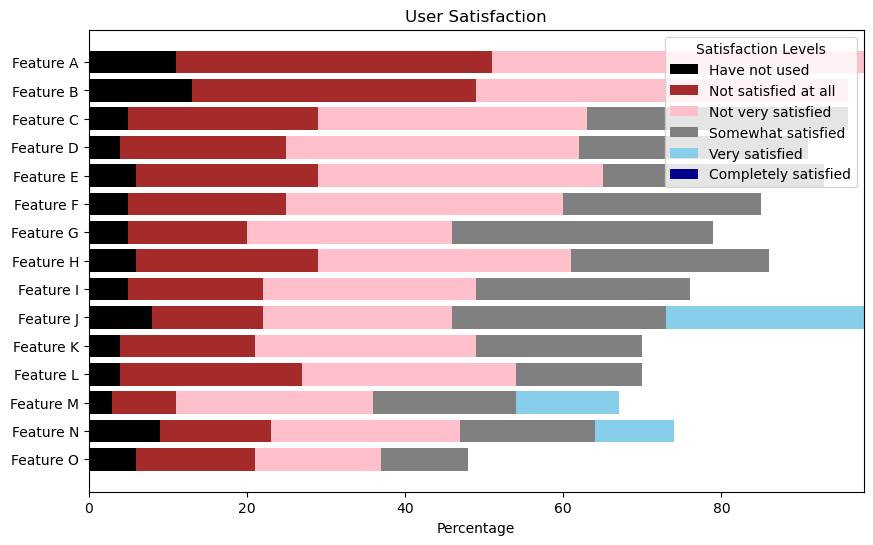

In [12]:
# Re-import necessary libraries after execution state reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Creating the data for user satisfaction categories
categories = [
    "Feature A", "Feature B", "Feature C", "Feature D", "Feature E",
    "Feature F", "Feature G", "Feature H", "Feature I", "Feature J",
    "Feature K", "Feature L", "Feature M", "Feature N", "Feature O"
]

# Percentage breakdowns for each category
data = np.array([
    [11, 40, 47],  # Feature A
    [13, 36, 47],  # Feature B
    [5, 24, 34, 33],  # Feature C
    [4, 21, 37, 29],  # Feature D
    [6, 23, 36, 28],  # Feature E
    [5, 20, 35, 25],  # Feature F
    [5, 15, 26, 33],  # Feature G
    [6, 23, 32, 25],  # Feature H
    [5, 17, 27, 27],  # Feature I
    [8, 14, 24, 27, 25],  # Feature J
    [4, 17, 28, 21],  # Feature K
    [4, 23, 27, 16],  # Feature L
    [3, 8, 25, 18, 13],  # Feature M
    [9, 14, 24, 17, 10],  # Feature N
    [6, 15, 16, 11]   # Feature O
], dtype=object)

# Labels for different satisfaction levels
labels = [
    "Have not used", "Not satisfied at all", "Not very satisfied",
    "Somewhat satisfied", "Very satisfied", "Completely satisfied"
]

# Colors for different segments
colors = ["black", "brown", "pink", "gray", "skyblue", "darkblue"]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bar chart
bottom = np.zeros(len(categories))  # Start stacking from zero
for i, (label, color) in enumerate(zip(labels, colors)):
    values = np.array([row[i] if len(row) > i else 0 for row in data])
    ax.barh(categories, values, left=bottom, color=color, label=label)
    bottom += values  # Stack on top

# Formatting the chart
ax.set_xlabel("Percentage")
ax.set_title("User Satisfaction")
ax.legend(title="Satisfaction Levels", loc="upper right", fontsize=10)

# Display the chart
plt.gca().invert_yaxis()  # Reverse category order for better readability
plt.show()